# Mat->Py->Mat Multi PSD Example

This notebook is an example, with multiple power spectra, of integrating Python FOOOF into a Matlab workflow. 

It is part of a trio of files that must be run in order:
- `MultiPSD_A_*
- `MultiPSD_B_*
- `MultiPSD_C_*

This code must be run after `MultiPSD_A_matlab_preprocessing.m` has been run. 

In [1]:
%matplotlib inline

import numpy as np
from scipy.io import loadmat, savemat

from fooof import FOOOFGroup

In [2]:
# Load the mat file 
dat = loadmat('power_spectra.mat')

# Unpack data from dictionary, and squeeze into numpy arrays
freqs = np.squeeze(dat['freqs']).astype('float')
psds = np.squeeze(dat['psds']).astype('float')
# ^Note: this also explicitly enforces type as float (type casts to float64, instead of float32)
#  This is not strictly necessary for fitting, but is for saving out as json from FOOOF, if you want to do that

# Transpose power spectra, to have the expected orientation for FOOOF
psds = psds.T  

In [3]:
# Initialize FOOOF object
fg = FOOOFGroup()

Running FOOOFGroup across 2 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 2                              
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                            

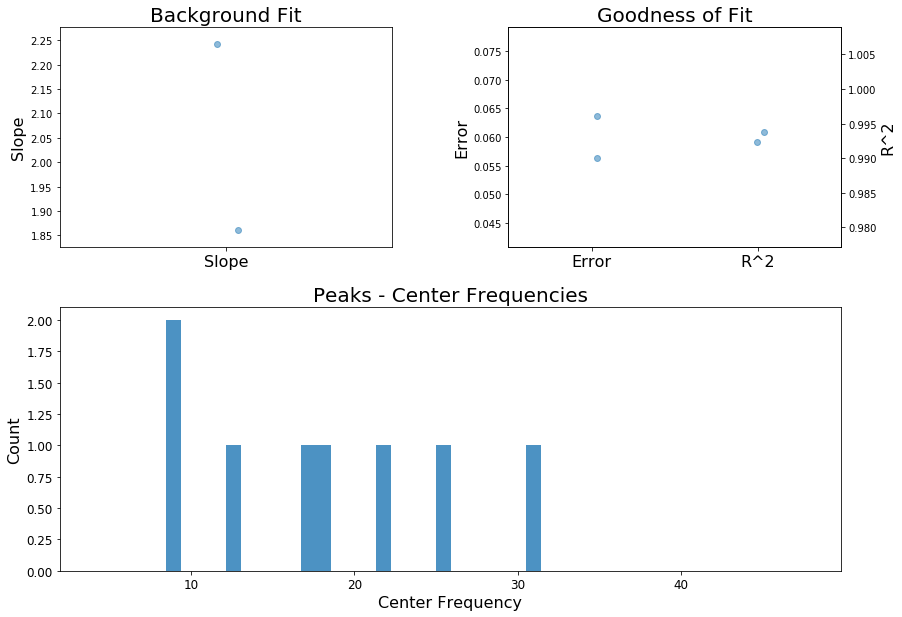

In [4]:
# Fit the FOOOF model on all PSDs, and report
fg.report(freqs, psds, [1, 50])

In [5]:
# Save out a specific FOOOF measure of interest - for example, slopes
sls = fg.get_all_data('background_params', 'slope')
savemat('slopes', {'slopes' : sls})

In [6]:
# Save out fooof results to json file
#  There is a utility file to load this json file directly into Matlab
fg.save('fooof_results', save_results=True)

In [7]:
# Alternatively: save out full FOOOFresults for each PSD fit separately to mat files
#  This might be useful if you are using Matlab < r2016B, and don't have json support
for ind, f_res in enumerate(fg):
    savemat('f_res_' + str(ind), f_res._asdict())